In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv
/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


<div class="alert alert-warning">  
<h1><strong>🍿Movies and TV shows on streaming platforms</strong></h1>
    <h4>During the pandemic,the popularity of streaming platforms has soared immensely📈 <br><br>
    Embracing the new normal,here's an EDA of the same.</h4>
</div>

<div>
<img src="https://cdn.technadu.com/wp-content/uploads/2020/04/Netflix-Amazon-Prime-Hulu-Disney-Plus-Logos.png" width="550"/>
</div>

<div class="alert alert-info">  
<h3><strong>Imports</strong></h3>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

<div class="alert alert-info">  
<h3><strong>Custom Color Palette</strong></h3>
</div>

In [3]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

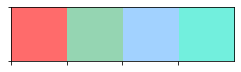

In [4]:
sns.palplot(sns.color_palette(custom_colors),size=1)

<h3>Netflix</h3>

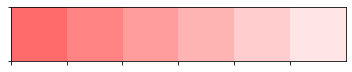

In [5]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

<h3>Hulu</h3>

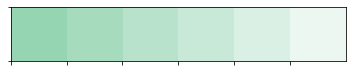

In [6]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

<h3>Prime Video</h3>

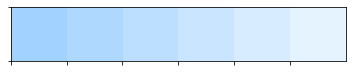

In [7]:
prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

<h3>Disney+</h3>

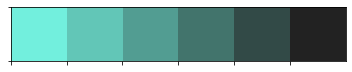

In [8]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

<div class="alert alert-info">  
<h3><strong>Loading the dataset and displaying rows</strong></h3>
</div>

In [9]:
df_tv = pd.read_csv('../input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv')
df_movies = pd.read_csv('../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv')

In [10]:
df_tv = df_tv.drop(['Unnamed: 0'], axis = 1) 
df_tv.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [11]:
df_movies = df_movies.drop(['Unnamed: 0','ID'], axis = 1) 
df_movies.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


<h3> Number of unique directors for movies </h3>

In [12]:
len(df_movies['Directors'].unique())

11339

<h3>Number of unique genres for movies </h3>

In [13]:
len(df_movies['Genres'].unique())

1910

<div class="alert alert-info">  
<h3><strong>Feature generation</strong></h3>
</div>

In [14]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [15]:
m_genres = splitting(df_movies,'Genres')
m_lang = splitting(df_movies,'Language')

Done!
Done!


<div class="alert alert-info">  
<h3><strong>TV shows and Movies per platform</strong></h3>
</div>

In [16]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [17]:
val_counts = []
dfs = [df_movies,df_tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [18]:
val_counts

[3560, 903, 12354, 564, 1931, 1754, 2144, 180]

In [19]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

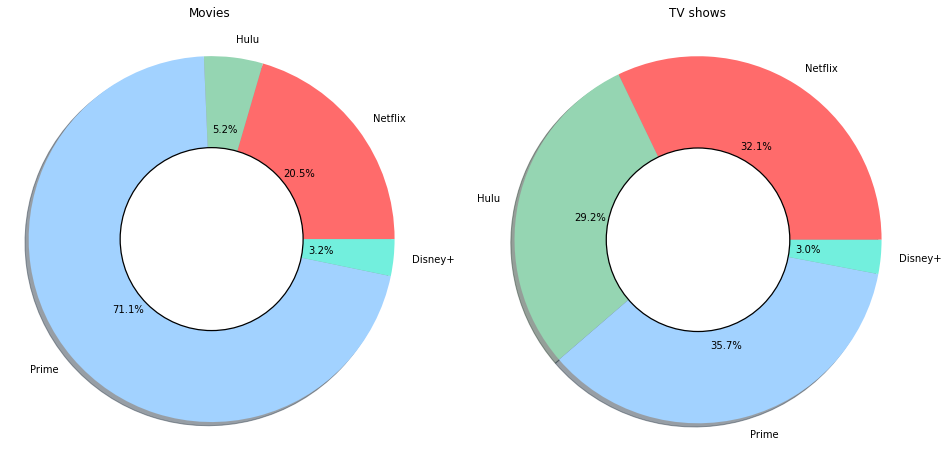

In [20]:
fig = plt.subplots(figsize=(16, 8))
labels = 'Netflix', 'Hulu','Prime','Disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
sizes2 = [val_counts[4], val_counts[5],val_counts[6],val_counts[7]]
colors = custom_colors
explode = (0, 0, 0, 0) 

donut(121,df_movies,sizes1,'Movies')
donut(122,df_tv,sizes2,'TV shows')
plt.show()

<div class="alert alert-info">  
<h3><strong>Movies with the highest IMDb rating on each platform and genres</strong></h3>
</div>

In [21]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()

In [22]:
sunburst(df_movies,'Netflix','amp')

In [23]:
sunburst(df_movies,'Hulu','Blugrn')

In [24]:
sunburst(df_movies,'Prime Video','haline')

In [25]:
sunburst(df_movies,'Disney+','dense')

<div class="alert alert-info">  
<h3><strong>Distribution of runtime and release year of movies</strong></h3>
</div>

In [26]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=custom_colors[c],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=custom_colors[c],shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15);

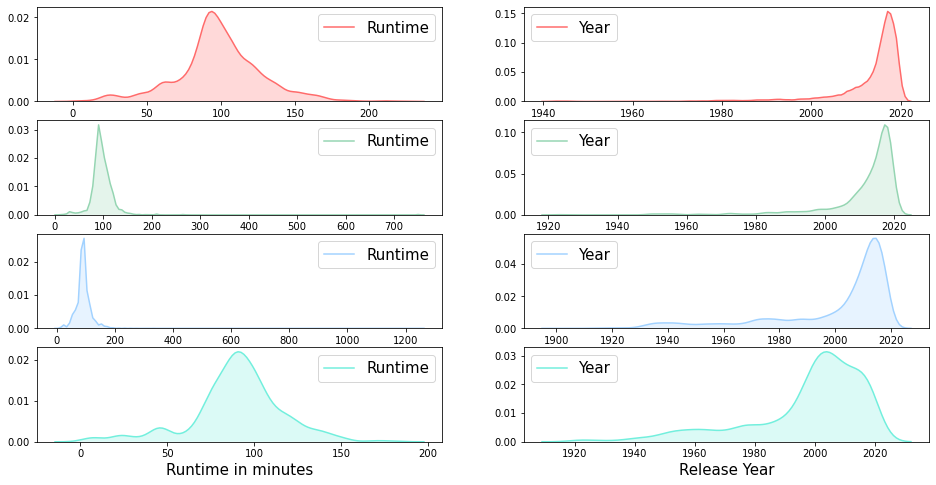

In [27]:
plt.figure(figsize = (16, 8))

kde(421,df_movies,'Netflix',0)
kde(423,df_movies,'Hulu',1)
kde(425,df_movies,'Prime Video',2)
kde(427,df_movies,'Disney+',3)

<div class="alert alert-info">  
<h3><strong>TV shows with minimum age requirement on each platform</strong></h3>
</div>

In [28]:
df_t = df_tv.copy()
df_t = df_t[df_t['Age'].notna()]

In [29]:
df_t['Age']=df_t['Age'].str.replace('+','')
df_t['Age']=df_t['Age'].str.replace('all','0')
df_t['Age']=df_t['Age'].astype(str).astype(int)

In [30]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
#     ax = sns.countplot(x="Age", data=dataframe, palette=p, order=dataframe['Age'].value_counts().index[0:15])
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)
    plt.legend(fontsize = 15);

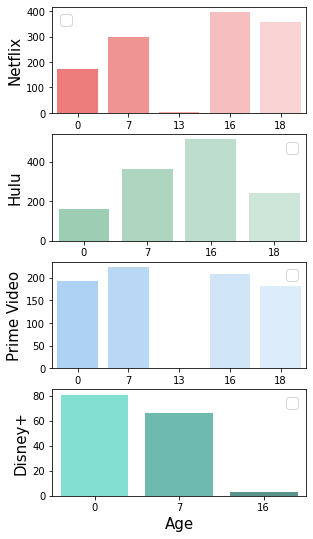

In [31]:
plt.figure(figsize = (10, 9))

barplot(421,df_t,'Netflix',netflix_p)
barplot(423,df_t,'Hulu',hulu_p)
barplot(425,df_t,'Prime Video',prime_p)
barplot(427,df_t,'Disney+',disney_p)

<div class="alert alert-info">  
<h3><strong>TV shows with the highest IMDb rating vs availability</strong></h3>
</div>

In [32]:
r = df_tv.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+']]
r.style.bar(subset=["Netflix",], color='#ff6b6b')\
                 .bar(subset=["Hulu"], color='#95d5b2')\
                 .bar(subset=["Prime Video"], color='#a2d2ff')\
                 .bar(subset=["Disney+"], color='#72efdd')\
                 .bar(subset=["IMDb"],color='#').background_gradient(cmap='Purples')

,Title,IMDb,Netflix,Hulu,Prime Video,Disney+
3023,Destiny,9.600000,0,1,0,0
0,Breaking Bad,9.500000,1,0,0,0
3747,Malgudi Days,9.500000,0,0,1,0
3177,Hungry Henry,9.500000,0,1,0,0
3567,Band of Brothers,9.400000,0,0,1,0
2365,The Joy of Painting,9.400000,0,1,1,0
4128,Green Paradise,9.300000,0,0,1,0
91,Our Planet,9.300000,1,0,0,0
3566,The Wire,9.300000,0,0,1,0
325,Ramayan,9.300000,1,0,0,0


<div class="alert alert-info">  
<h3><strong>Movies with the highest IMDb rating, genres and languages</strong></h3>
</div>

In [33]:
r1 = df_movies.sort_values(by='IMDb', ascending=False)
r1 = r1[0:10]
r1['Movies']='Movies'
fig = px.treemap(r1, path=['Movies','Title', 'Genres','Language'], values='IMDb',color='IMDb',color_continuous_scale='Purp')
fig.show()

<div class="alert alert-info">  
<h3><strong>Movies with the highest Rotten Tomatoes rating vs directors</strong></h3>
</div>

In [34]:
df_m = df_movies.copy()
df_m = df_m.dropna()

df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].str.replace('%','')
df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].astype(str).astype(int)
df_m['Directors']=df_m['Directors'].astype('str')

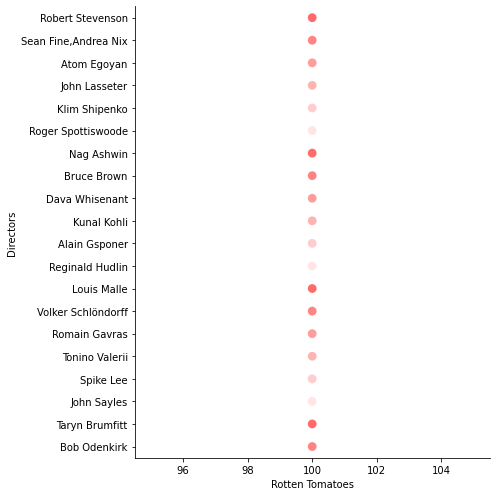

In [35]:
df_m=df_m.sort_values(by='Rotten Tomatoes', ascending=False)
rating = df_m[0:20]
sns.catplot(x="Rotten Tomatoes", y="Directors",data=rating, palette=netflix_p,height=7,kind="point")

<div class="alert alert-info">  
<h3><strong>Languages and genres of movies on all platforms</strong></h3>
</div>

In [36]:
df_l_merged = pd.concat([df_movies, m_lang], axis = 1, sort = False)
df_g_merged = pd.concat([df_movies, m_genres], axis = 1, sort = False)

In [37]:
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies'])
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

<div>
<img src="https://download.logo.wine/logo/Netflix/Netflix-Logo.wine.png" width="350"/>
</div>

In [38]:
bar(df_l_merged,'Netflix','#ff6b6b')

,Number of movies
English,2264
Hindi,377
Spanish,332
French,212
German,106
Japanese,91
Arabic,89
Mandarin,83
Italian,67
Turkish,58


In [39]:
bar(df_g_merged,'Netflix','#ff6b6b')

,Number of movies
Drama,1501
Comedy,1308
Thriller,652
Romance,551
Action,545
Documentary,511
Crime,372
Adventure,318
Family,315
Horror,266


<div>
<img src=" https://s3.amazonaws.com/inside-the-brand-stage/wp-content/uploads/2019/01/HULU-1000x331.png" width="300"/>
</div>

In [40]:
bar(df_l_merged,'Hulu','#95d5b2')

,Number of movies
English,815
French,73
Spanish,66
German,41
Japanese,35
Italian,23
Russian,18
Mandarin,17
Korean,16
Danish,13


In [41]:
bar(df_g_merged,'Hulu','#95d5b2')

,Number of movies
Drama,438
Comedy,272
Thriller,221
Romance,151
Documentary,132
Action,129
Horror,124
Adventure,111
Family,105
Crime,100


<div>
<img src=" https://assets.stickpng.com/images/5f4924f968ecc70004ae7066.png" width="300"/>
</div>

In [42]:
bar(df_l_merged,'Prime Video','#a2d2ff')

,Number of movies
English,10088
French,522
Spanish,493
Hindi,424
Italian,352
German,341
Mandarin,268
Japanese,195
Russian,157
Cantonese,127


In [43]:
bar(df_g_merged,'Prime Video','#a2d2ff')

,Number of movies
Drama,5437
Comedy,3004
Thriller,2632
Action,2049
Documentary,1895
Horror,1878
Romance,1691
Crime,1423
Adventure,1166
Mystery,983


<div>
<img src=" https://download.logo.wine/logo/Disney%2B/Disney%2B-Logo.wine.png" width="350"/>
</div>

In [44]:
bar(df_l_merged,'Disney+','#72efdd')

,Number of movies
English,557
French,30
Spanish,20
German,17
Italian,11
Mandarin,7
Japanese,6
Xhosa,4
Russian,4
Korean,4


In [45]:
bar(df_g_merged,'Disney+','#72efdd')

,Number of movies
Family,430
Comedy,281
Adventure,258
Fantasy,176
Drama,162
Animation,146
Action,88
Sci-Fi,88
Musical,84
Romance,78
